<H1>SALARY PREDICTION</H1>

<h2>Data Loading and Preprocessing</h2>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score  # Add cross_val_score here

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [12]:
# Load the dataset
data = pd.read_csv('salary_data.csv')

In [13]:
# Explore the data
print(data.head())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [14]:
# Extract features and target variable
X = data['YearsExperience'].values.reshape(-1, 1)  # Feature: Years of Experience
y = data['Salary']  # Target variable: Salary

In [15]:
 #Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h2> Model Training and Prediction</h2>

In [16]:
# Create Linear Regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [17]:
# Create Random Forest model (optional)
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [18]:
# Cross-validation for model evaluation
cv_scores_lr = cross_val_score(model_lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_rf = cross_val_score(model_rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')


In [19]:
print('Linear Regression - Cross-Validation Mean Squared Error:', -np.mean(cv_scores_lr))
print('Random Forest - Cross-Validation Mean Squared Error:', -np.mean(cv_scores_rf))


Linear Regression - Cross-Validation Mean Squared Error: 32166986.911928423
Random Forest - Cross-Validation Mean Squared Error: 28640256.74909758


In [20]:
# Predictions
y_pred_lr = model_lr.predict(X_test)
y_pred_rf = model_rf.predict(X_test)

In [21]:
# Model evaluation on the test set
print('Linear Regression - Mean Squared Error:', mean_squared_error(y_test, y_pred_lr))
print('Linear Regression - R-squared:', r2_score(y_test, y_pred_lr))

print('Random Forest - Mean Squared Error:', mean_squared_error(y_test, y_pred_rf))
print('Random Forest - R-squared:', r2_score(y_test, y_pred_rf))

Linear Regression - Mean Squared Error: 49830096.85590839
Linear Regression - R-squared: 0.9024461774180497
Random Forest - Mean Squared Error: 63721129.712950476
Random Forest - R-squared: 0.8752513004196268


<h2>Model Evaluation</h2>

<h2>Visualization</h2>
<h5>Visualization 1: Plots the training data and the regression line generated by the Linear Regression model using the training data.</h5>
<h5>
Visualization 2: Creates a scatter plot comparing actual test data with predictions from both models, overlaying the regression line for Linear Regression</h5>

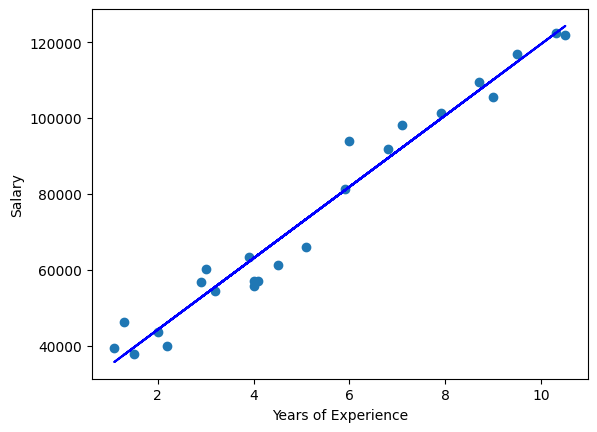

In [22]:
#Using Training Data
plt.scatter(X_train, y_train)
plt.plot(X_train , model_lr.predict(X_train) , 'b')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


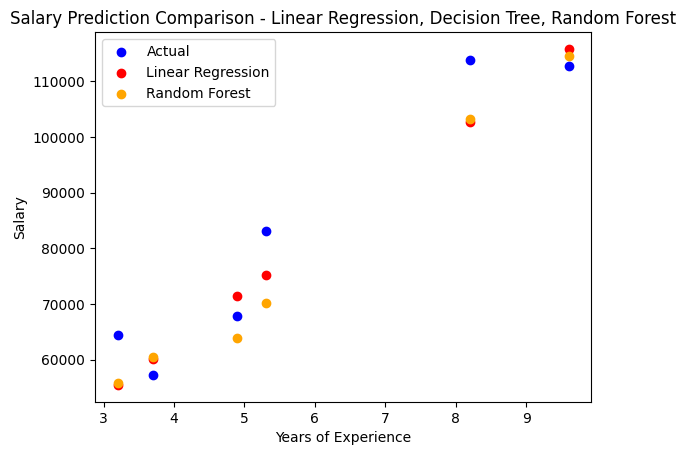

In [23]:
# Scatter plot for Linear Regression predictions
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_lr, color='red', label='Linear Regression')
plt.scatter(X_test, y_pred_rf, color='orange', label='Random Forest')



plt.legend()
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary Prediction Comparison - Linear Regression, Decision Tree, Random Forest')
plt.show()

<h2>Predicting New Values and Comparing MSE</h2>

In [27]:
# New value for prediction
new_experience = [[5.3]]  # Example: Predict salary for 5.5 years of experience

# Predict salary using Linear Regression model
predicted_salary_lr = model_lr.predict(new_experience)
predicted_salary_rf = model_rf.predict(new_experience)

# Display the predicted salaries
print(f'Linear Regression - Predicted salary for 5.3 years of experience: ${predicted_salary_lr[0]:,.2f}')
print(f'Random Forest - Predicted salary for 5.3 years of experience: ${predicted_salary_rf[0]:,.2f}')


Linear Regression - Predicted salary for 5.3 years of experience: $75,267.80
Random Forest - Predicted salary for 5.3 years of experience: $70,152.12


In [28]:
# Actual salary for 5.3 years
actual_salary = 83088

# Predicted salaries for 5.5 years from each model
predicted_salary_lr = 77152.57
predicted_salary_rf = 71191.83

# Calculate residuals
residual_lr = actual_salary - predicted_salary_lr
residual_rf = actual_salary - predicted_salary_rf

# Print residuals
print('Linear Regression Residual:', residual_lr)
print('Random Forest Residual:', residual_rf)


Linear Regression Residual: 5935.429999999993
Random Forest Residual: 11896.169999999998


<h3>MSE Comparison</h3>

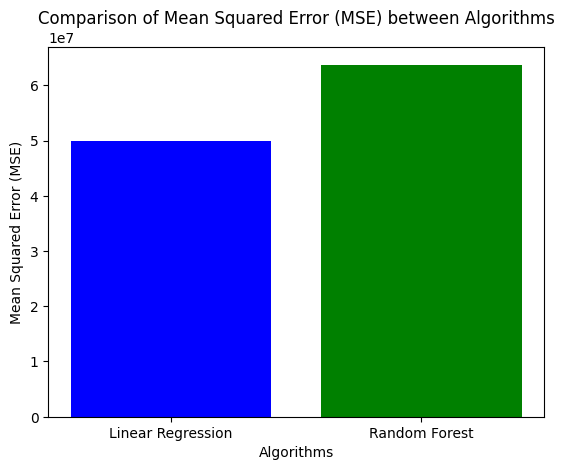

In [29]:

# MSE values
mse_lr =  49830096.85590839
mse_rf= 63721129.712950476
# Creating a bar chart to compare MSE values
mse_values = [mse_lr,mse_rf]
labels = ['Linear Regression', 'Random Forest']

plt.bar(labels, mse_values, color=['blue', 'green','Red'])
plt.xlabel('Algorithms')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Mean Squared Error (MSE) between Algorithms')
plt.show()


In [30]:
import joblib
joblib.dump(model_lr, 'linear_regression_model.joblib')
joblib.dump(model_rf, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [31]:
loaded_model_lr = joblib.load('linear_regression_model.joblib')
loaded_model_rf = joblib.load('random_forest_model.joblib')